# Module 6 Peer Review Assignment Solutions

This is the rubric for the Module 6 peer review assessment. Do your best to interpret what has been written by fellow students and give them the benefit of the doubt when it comes to understanding with an eye towards improvement. You can give partial credit if you feel the mistakes were minor and/or partial comprehension attained. Questions may call for simulating data, which may result in the student having different distributions and graphs than the ones in this solution file. Be sure to grade their work, not just their accuracy to these solutions. Finally, be kind to your fellow students, if for no other reason than it will engender kindness in return.

# Problem 1

Suppose $X$ and $Y$ are independent normal random variables with the same mean $\mu$ and the same variance $\sigma^2$. Do the random variables $W = X + Y$ and $U=2X$ have the same distribution? Explain.

No. $E[W] = E[X] + E[Y] = \mu + \mu = 2\mu$ and $Var(W) = Var(X) + Var(Y) = \sigma^2 + \sigma^2 = 2\sigma^2$ so by the Central Limit Theorem, $W \sim N(2\mu, 2\sigma^2)$. 

On the other hand, $E[U]=E[2X] = 2E[X] = 2\mu$ and $Var(U) = Var(2X) = 2^2Var(X) = 4\sigma^2$, so $U \sim N(2\mu, 4\sigma^2)$.

# Problem 2: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$?

$$E[X]=\frac{a+b}{2} = \frac{0+100}{2} = 50$$

$$ Var(X) = \frac{1}{12}(b-a)^2 = \frac{1}{12}(100 - 0)^2 \approx 833.33 $$

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [12]:
uniform.sample.mean = function(n){
    
    samples = runif(n, 0, 100)
    sample.mean = mean(samples)
    return(sample.mean)
}

uniform.sample.mean(10)

[1] 39.23107

In [16]:
uniform.sample.mean(100)

[1] 50.35543

In [17]:
uniform.sample.mean(1000)

[1] 49.94942

The theoretical mean is 50, and our sample mean when $n=10$ was 39.2. This isn't a great approximation of the actual mean. However, when we increase $n$, we can see that the sample mean approaches the theoretical mean.

**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

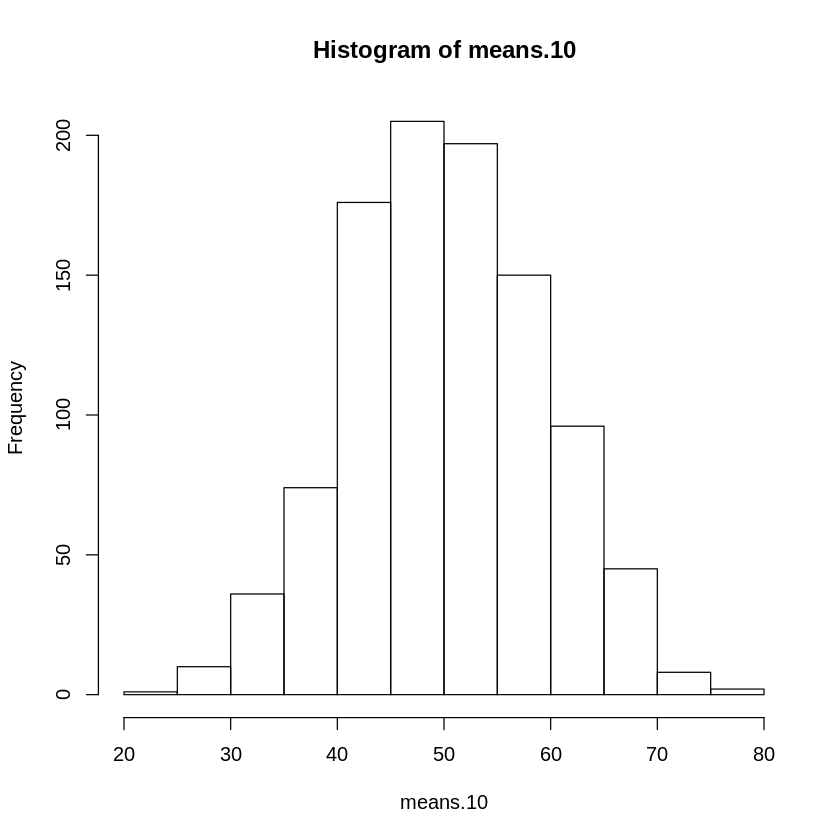

In [20]:
get.sample.means = function(m, n){
    means = numeric(m)
    for (i in 1:m){
        means[i] = uniform.sample.mean(n)
    }
    return(means)
}

m = 1000
means.10 = get.sample.means(m, 10)
hist(means.10)

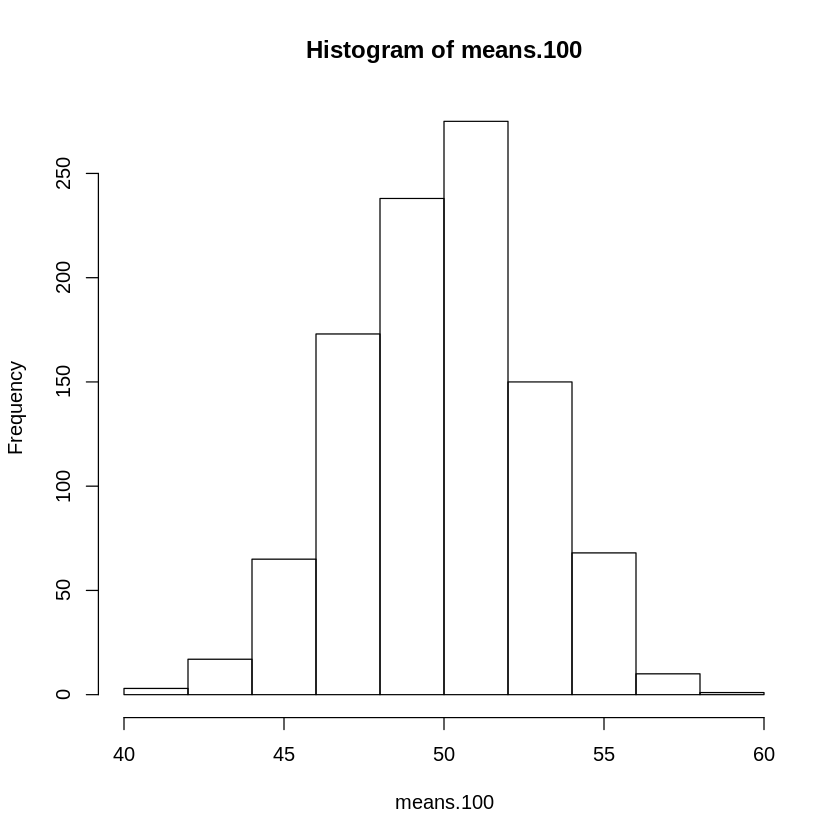

In [21]:
means.100 = get.sample.means(m, 100)
hist(means.100)

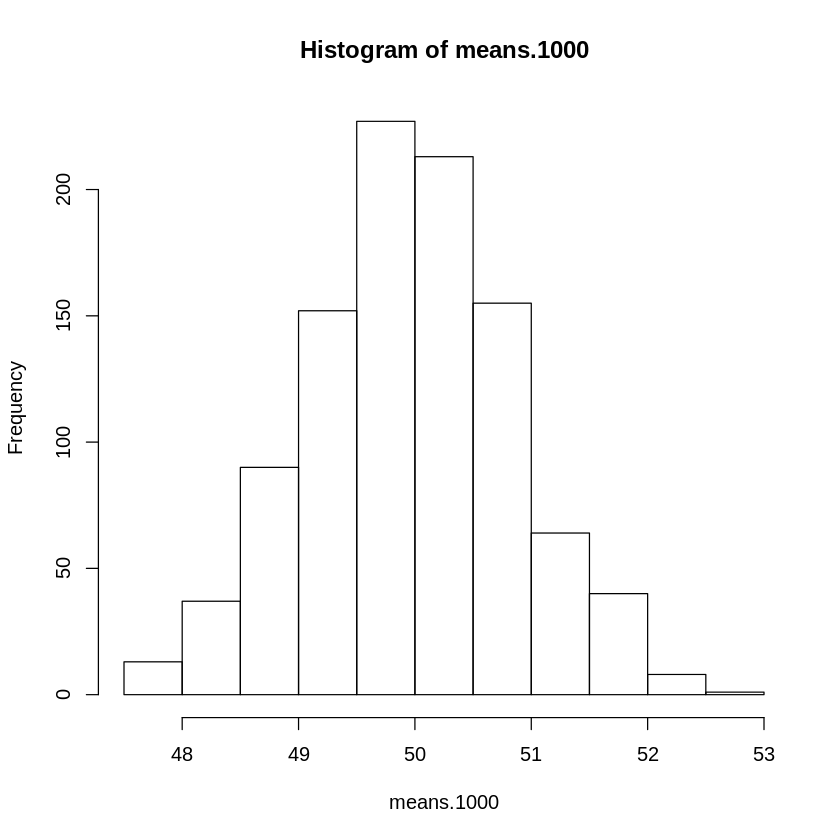

In [23]:
means.1000 = get.sample.means(m, 1000)
hist(means.1000)

We can notice a few things:
* The distribution of $\bar{X}$ is normal.
* The distribution is always centered at about $50$, no matter how $n$ changes.
* As $n$ increases, the variance of $\bar{X}$ decreases.As V(X_bar) = V(X)/n


All of these conclusions agree with our formulations about the Central Limit Theorem.

**d)** Recall that our underlying population distribution is $U(0, 100)$. Try changing the underlying distribution (For example a binomial(10, 0.5)) and check the sample distribution. Be sure to explain what you notice.

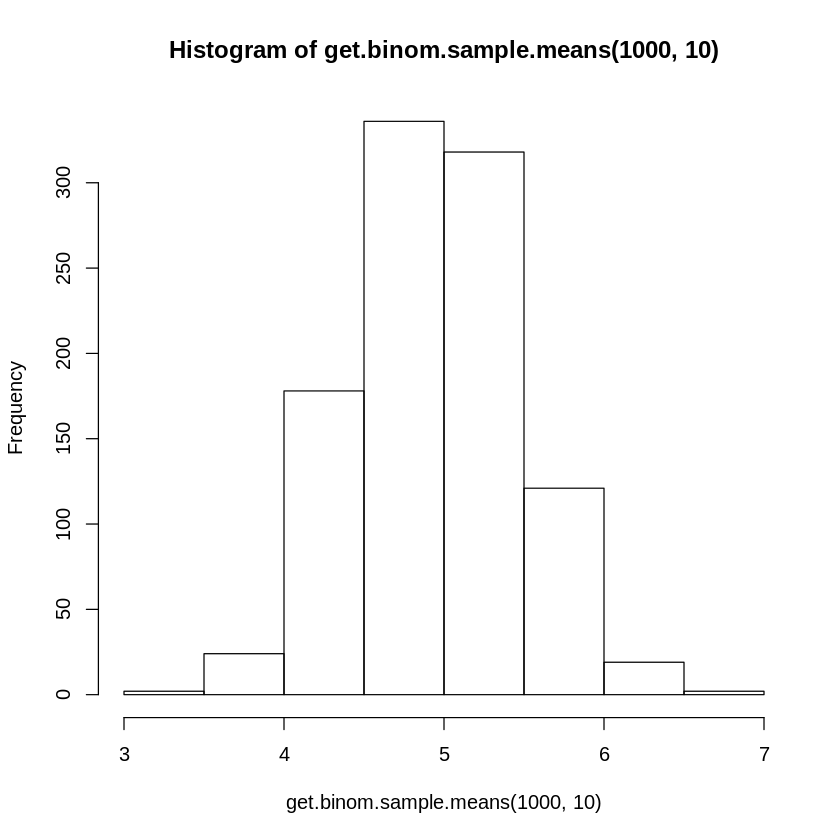

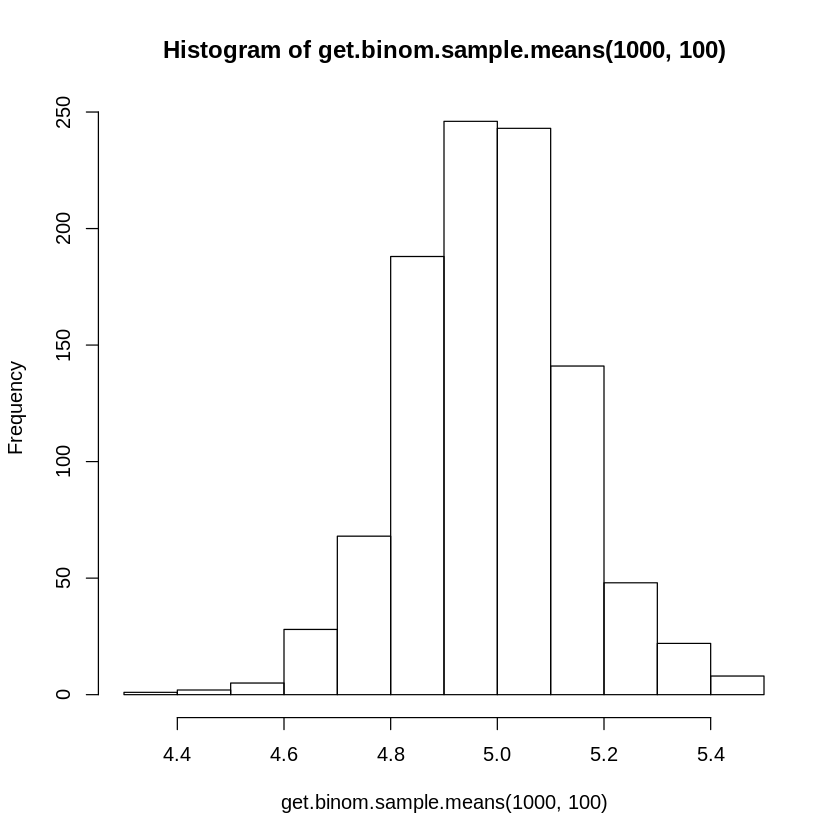

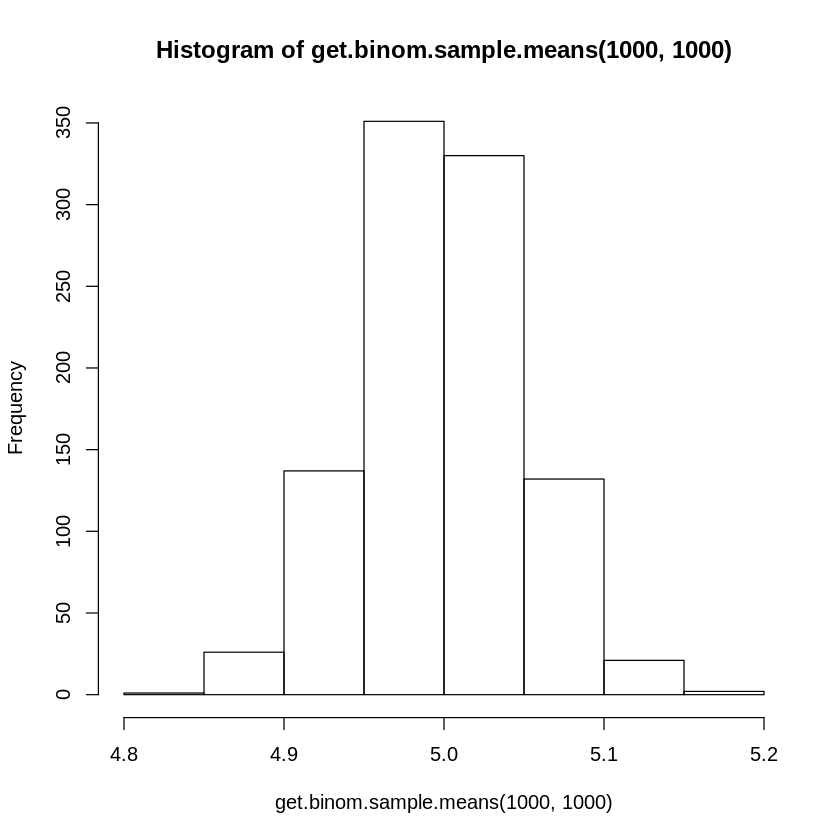

In [26]:
# Let's repeat the process with a binomial(10, 0.5) distribution
binomial.sample.mean = function(n){
    
    samples = rbinom(n, 10, 0.5)
    sample.mean = mean(samples)
    return(sample.mean)
}

get.binom.sample.means = function(m, n){
    means = numeric(m)
    for (i in 1:m){
        means[i] = binomial.sample.mean(n)
    }
    return(means)
}

hist(get.binom.sample.means(1000, 10))
hist(get.binom.sample.means(1000, 100))
hist(get.binom.sample.means(1000, 1000))

We can see that this sample distribution is similar to that of the uniform's sample distribution. It also maintains the three properties that we noted earlier. This should give us a good idea that the Centrel Limit Theorem applies to the means of any underlying distribution, so long as the sample size is large enough.

# Problem 3

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$.

From the Central Limit Theorem, we know $\bar{X}_n \sim N(\mu, \sigma^2)$. By plugging in the values given above, we get:

$$
\bar{X}_n \sim  N\left(\frac{1+6}{2}, \frac{(6-1+1)^2-1}{12n}\right) = N\left(3.5, \frac{2.92}{n}\right)
$$

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

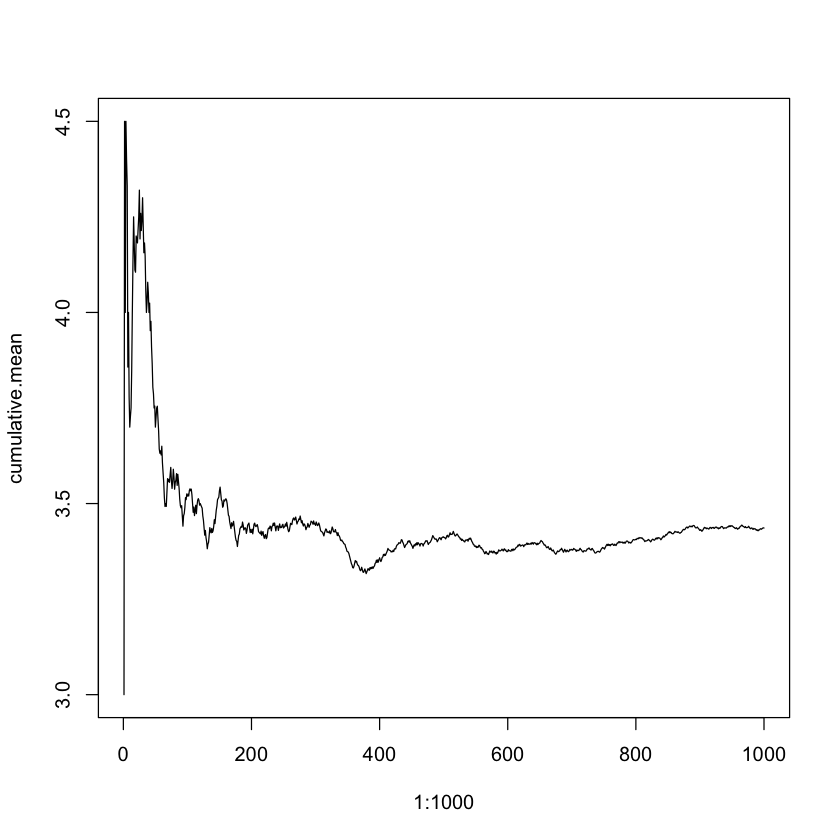

In [1]:
# Generate 1000 rolls from a fair d6
rolls = sample(1:6, size=1000, replace=TRUE)
# Calculate the cumulative average
sum.of.rolls = cumsum(rolls)
cumulative.mean = sum.of.rolls / (1:1000)
# Plot the cumulative sum over iteration
plot(x=1:1000, y=cumulative.mean, type="l")

We can see that as the number of iterations increases, the calculated average gets closer and closer to the theoretical mean 3.5. This again supports the CLT and the idea that the simulated average will get closer to the theoretical average as the number of data points increases.